### adj for 3 types

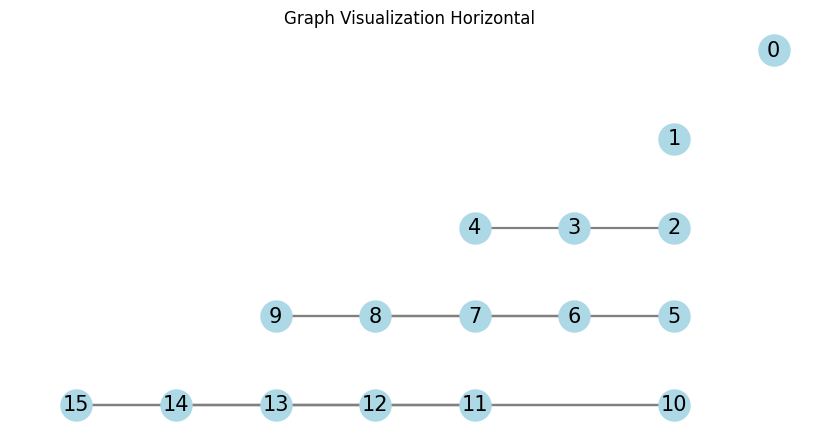

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 定义坐标
coordinates = np.array([
    [0, 1],
    [-0.1, 0.8],
    [-0.1, 0.6], [-0.2, 0.6], [-0.3, 0.6],
    [-0.1, 0.4], [-0.2, 0.4], [-0.3, 0.4], [-0.4, 0.4], [-0.5, 0.4],
    [-0.1, 0.2], [-0.3, 0.2], [-0.4, 0.2], [-0.5, 0.2], [-0.6, 0.2], [-0.7, 0.2]
])

# 创建空的邻接矩阵
n_points = coordinates.shape[0]
adjacency_matrix_groups = np.zeros((n_points, n_points), dtype=float)  # 使用float类型以保存距离信息

# 定义组连接
groups = [
    [0],      # Group 1
    [1],      # Group 2
    [2, 3, 4],  # Group 3
    [5, 6, 7, 8, 9],  # Group 4
    [10, 11, 12, 13, 14, 15]  # Group 5
]

# 为每组内的节点之间创建基于距离的连接
for group in groups:
    for i in group:
        for j in group:
            if i != j:
                distance = np.linalg.norm(coordinates[i] - coordinates[j]) + 1e-5  # 计算距离并添加小常数以防除零
                adjacency_matrix_groups[i, j] = 1 / distance  # 使用距离的倒数作为权重

for i in range(n_points):
    adjacency_matrix_groups[i, i] = 0
# 进行行规范化
epsilon = 1e-5
row_sums = adjacency_matrix_groups.sum(axis=1, keepdims=True)
adjacency_matrix_groups = adjacency_matrix_groups / (row_sums + epsilon)
# 使用邻接矩阵创建图
G_groups = nx.from_numpy_array(adjacency_matrix_groups, create_using=nx.Graph())

# 指定每个节点的位置
positions = {i: coord for i, coord in enumerate(coordinates)}

# 可视化图形
plt.figure(figsize=(8, 4))
nx.draw(G_groups, pos=positions, with_labels=True, node_color='lightblue', node_size=500, font_size=15, font_color='black', edge_color='gray', width=1.5)
plt.title("Graph Visualization Horizontal")
plt.show()
file_path = "Horizontal_adj.npy"
# 保存数组到.npy文件
#np.save(file_path, adjacency_matrix_groups)

In [ ]:
adjacency_matrix_groups

In [ ]:
plt.imshow(adjacency_matrix_groups)

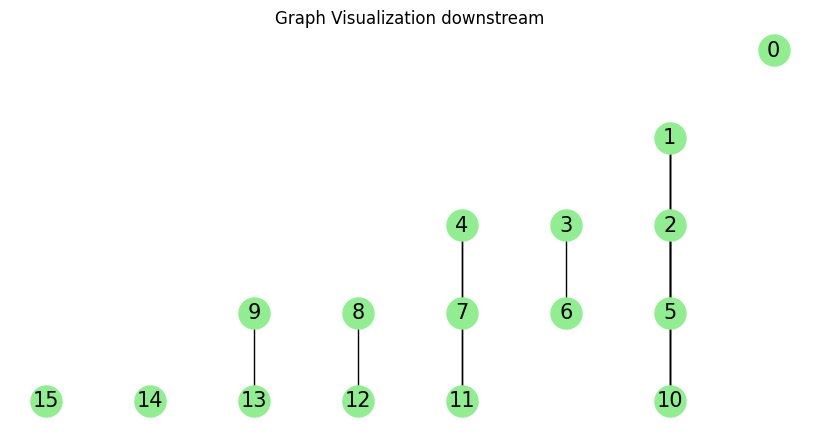

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 定义坐标
coordinates = np.array([
    [0, 1],
    [-0.1, 0.8],
    [-0.1, 0.6], [-0.2, 0.6], [-0.3, 0.6],
    [-0.1, 0.4], [-0.2, 0.4], [-0.3, 0.4], [-0.4, 0.4], [-0.5, 0.4],
    [-0.1, 0.2], [-0.3, 0.2], [-0.4, 0.2], [-0.5, 0.2], [-0.6, 0.2], [-0.7, 0.2]
])

# 创建邻接矩阵
n_points = coordinates.shape[0]
adjacency_matrix = np.zeros((n_points, n_points))

# 定义连接
groups = [
    [0],      # Group 1
    [1,2,5,10],      # Group 2
    [3,6],  # Group 3
    [4,7,11],  # Group 4
    [8,12],  # Group 5
    [9,13],
    [14],
    [15]
]


# 为每组内的节点之间创建基于距离的连接
for group in groups:
    for i in group:
        for j in group:
            if i != j:
                distance = np.linalg.norm(coordinates[i] - coordinates[j]) + 1e-5  # 计算距离并添加小常数以防除零
                adjacency_matrix[i, j] = 1 / distance  # 使用距离的倒数作为权重

# 添加自环
for i in range(n_points):
    adjacency_matrix[i, i] = 0
# 进行行规范化
epsilon = 1e-5
row_sums = adjacency_matrix.sum(axis=1, keepdims=True)
adjacency_matrix = adjacency_matrix / (row_sums + epsilon)
# 使用正确的函数从邻接矩阵创建图
G = nx.from_numpy_array(adjacency_matrix)

# 指定每个节点的位置
positions = {i: coord for i, coord in enumerate(coordinates)}

# 可视化图形
plt.figure(figsize=(8, 4))
nx.draw(G, pos=positions, with_labels=True, node_color='lightgreen', node_size=500, font_size=15, font_color='black')
plt.title("Graph Visualization downstream")
plt.show()
file_path = "Downstream.npy"
# 保存数组到.npy文件
#np.save(file_path, adjacency_matrix_groups)


In [ ]:
adjacency_matrix

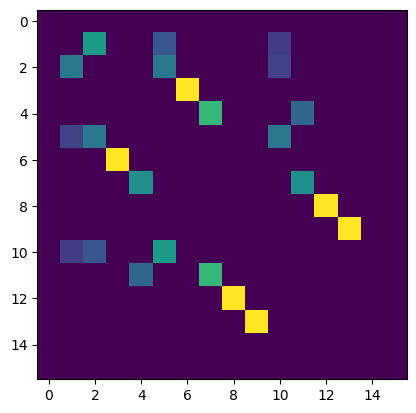

In [2]:
plt.imshow(adjacency_matrix)

In [5]:
import numpy as np
import torch

# 输入坐标
coordinates = np.array([
    [0, 1],
    [-0.1, 0.8],
    [-0.1, 0.6], [-0.2, 0.6], [-0.3, 0.6],
    [-0.1, 0.4], [-0.2, 0.4], [-0.3, 0.4], [-0.4, 0.4], [-0.5, 0.4],
    [-0.1, 0.2], [-0.3, 0.2], [-0.4, 0.2], [-0.5, 0.2], [-0.6, 0.2], [-0.7, 0.2]
])

def calculate_distance_matrix(coords):
    coords = torch.tensor(coords, dtype=torch.float32)  # 转换为PyTorch张量
    num_points = coords.shape[0]
    distance_matrix = torch.zeros((num_points, num_points), dtype=torch.float32)

    for i in range(num_points):
        for j in range(num_points):
            distance_matrix[i, j] = torch.norm(coords[i] - coords[j])
    return distance_matrix

def return_adj_matrix(coords, epsilon=1e-5):
    distance_matrix = calculate_distance_matrix(coords)

    # 转换距离矩阵为邻接矩阵，使用逆权重，并加上epsilon
    adj_matrix = torch.zeros_like(distance_matrix)
    for i in range(distance_matrix.shape[0]):
        for j in range(distance_matrix.shape[1]):
            if i != j:
                adj_matrix[i, j] = 1 / (distance_matrix[i, j] + epsilon)
    
    # 对邻接矩阵进行行规范化
    row_sums = adj_matrix.sum(dim=1, keepdim=True)
    adj_matrix_normalized = adj_matrix / (row_sums + epsilon)

    return adj_matrix_normalized

# 计算邻接矩阵
adj_matrix = return_adj_matrix(coordinates)



In [ ]:
plt.imshow(adj_matrix)

In [ ]:
# 使用正确的函数从邻接矩阵创建图
adj_matrix = adj_matrix.numpy()
G = nx.from_numpy_array(adj_matrix)

# 指定每个节点的位置
positions = {i: coord for i, coord in enumerate(coordinates)}

# 可视化图形
plt.figure(figsize=(8, 4))
nx.draw(G, pos=positions, with_labels=True, node_color='lightcyan', node_size=500, font_size=15, font_color='black')
plt.title("Graph Visualization full connected")
plt.show()